<a href="https://colab.research.google.com/github/janimiyarj/MIS-515-Practise/blob/main/Spotify_songs_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SPOTIFY SONGS CLASSIFICATION


The project involves the analysis of a Spotify songs dataset. It includes data exploration, preprocessing (such as handling missing values and label encoding), visualization of data distributions, training machine learning models (XGBoost and KNN), and evaluating model performance using various metrics and visualizations.


Dataset Link- https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs/


In [ ]:
# Import necessary libraries for data analysis and machine learning
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [ ]:
# Read the dataset from a CSV file ('spotify_songs.csv') into a Pandas DataFrame (df)
df = pd.read_csv('spotify_songs.csv')

In [ ]:
# Display the first few rows of the DataFrame (df) to get an initial overview of the dataset
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66.0,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67.0,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70.0,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60.0,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69.0,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
# Print information about the DataFrame, including shape, columns, data types, and missing values
print('Shape of the dataframe:', df.shape)
print()
print(df.columns)
print()
print(df.info())
print()
print(df.describe())
print()
print(df.isnull().sum())

Shape of the dataframe: (30428, 23)

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30428 entries, 0 to 30427
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  30428 non-null  object 
 1   track_name                30423 non-null  object 
 2   track_artist              30422 non-null  object 
 3   track_popularity          30427 non-null  float64
 4   track_album_id            30427 non-null  object 
 5   track_album_name          30422 non-null  object

In [ ]:
# Fill missing values in specific columns with the mode (most frequent value) from each column
df['track_name'].fillna(df['track_name'].mode()[0], inplace=True)
df['track_artist'].fillna(df['track_artist'].mode()[0], inplace=True)
df['track_album_name'].fillna(df['track_album_name'].mode()[0], inplace=True)


In [ ]:
# Print the count of unique values for the 'track_id' column
print('track_id column values and their count:')
df['track_id'].value_counts()

track_id column values and their count:


3eekarcy7kvN4yt5ZFzltW    9
7BKLCZ1jbUBVqRi2FVlTVw    9
14sOS5L36385FJ3OL8hew4    9
3ZCTVFBt2Brf31RLEnCkWJ    8
2Fxmhks0bxGSBdJ92vM42m    8
                         ..
4qajjURlmtTy1dRrZ3qowl    1
1zMiePWukCo5o7LfvmAFfI    1
4gETXGy39voJGFbvyYJ6gC    1
6kIjEtjnuvhGuHPhYW7WhB    1
36ux3YuUsGTWPT8fXclS45    1
Name: track_id, Length: 26478, dtype: int64

In [ ]:
# Print the count of unique values for the 'playlist_id' column
print('playlist_id column values and their count:')
df['playlist_id'].value_counts()

playlist_id column values and their count:


4JkkvMpVl4lSioqQjeAL0q    247
37i9dQZF1DWTHM4kX49UKs    198
3xMQTDLOIGvj3lWH5e5x6F    189
3Ho3iO0iJykgEQNbjB2sic    182
25ButZrVb1Zj1MJioMs09D    109
                         ... 
6dqoVI7qwYLyNqbg0MPad3      7
4sr2xEhXQR5VuZ0LZX8TQ8      7
2CJsD3fcYJWcliEKnwmovU      3
6pPpLz42hUkr8gbMirkAEl      3
6HprqD6WZMx5peClrxaprN      1
Name: playlist_id, Length: 444, dtype: int64

In [ ]:
# Print the count of unique values for the 'track_album_id' column
print('track_album_id column values and their count:')
df['track_album_id'].value_counts()

track_album_id column values and their count:


5L1xcowSxwzFUSJzvyMp48    42
5fstCqs5NpIlF42VhPNv23    29
7CjJb2mikwAWA1V6kewFBF    28
4VFG1DOuTeDMBjBLZT7hCK    26
2HTbQ0RHwukKVXAlTmCZP2    21
                          ..
1pRF8GkcT5PZgWqdhMEHvY     1
7phDO38vZACDmgav2HK8w2     1
4ZSaA7Nr5oJUacEkFe2WvH     1
585HAjkmk1LL2ceEdzOCQm     1
01GXagELExsfYmrdJ2kgh7     1
Name: track_album_id, Length: 20880, dtype: int64

In [ ]:
# Print the count of unique values for the 'track_artist' column
print('track_artist column values and their count:')
df['track_artist'].value_counts()

track_artist column values and their count:


Queen               142
Martin Garrix       118
The Chainsmokers    102
Don Omar            102
Drake                98
                   ... 
Don Henley            1
Triumph               1
BONES UK              1
AaRON                 1
R-Cue                 1
Name: track_artist, Length: 10067, dtype: int64

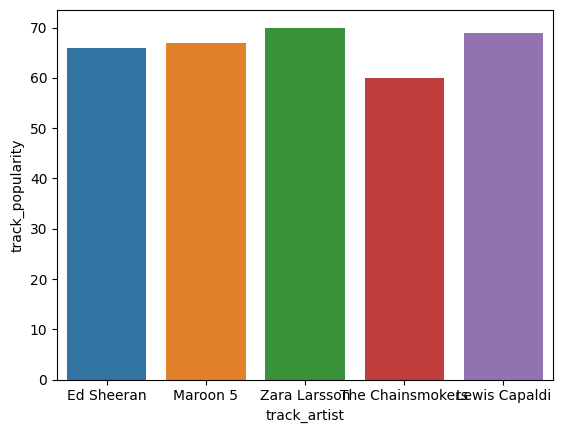

In [ ]:
# Create a bar plot using Seaborn to visualize the relationship between 'track_artist' and 'track_popularity'
sns.barplot(x='track_artist', y='track_popularity', data=df.head())
plt.show()

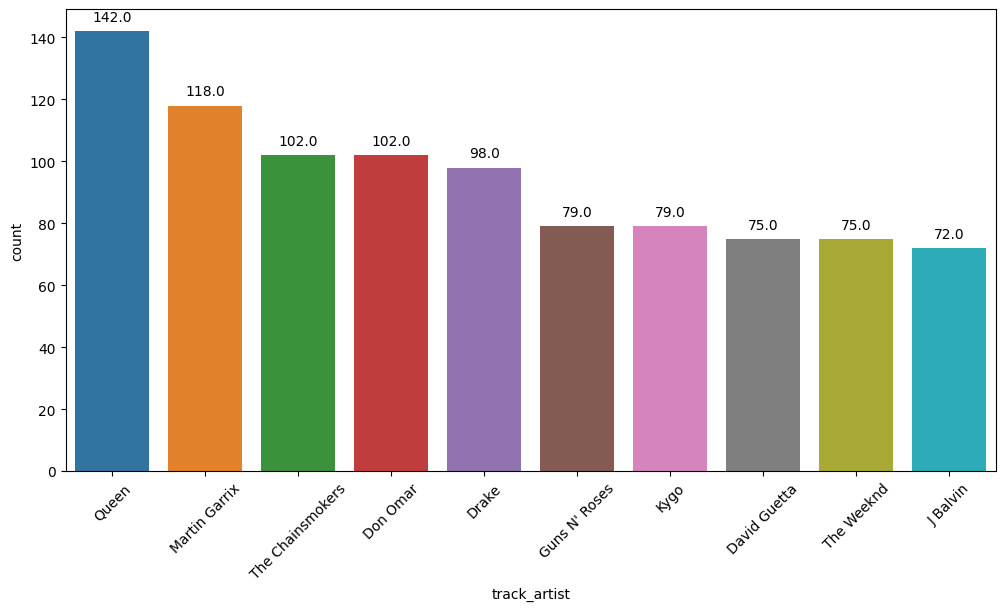

In [ ]:
# Create a count plot using Seaborn to visualize the distribution of the top track artists
top_track_artists = df['track_artist'].value_counts().nlargest(10)
top_track_artists_df = df[df['track_artist'].isin(top_track_artists.index)]

# Set the figure size for the count plot
plt.figure(figsize=(12, 6))

# Create a count plot using Seaborn, ordering by the top track artists
ax = sns.countplot(x='track_artist', data=top_track_artists_df ,order=top_track_artists.index)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.xticks(rotation=45)
plt.show()

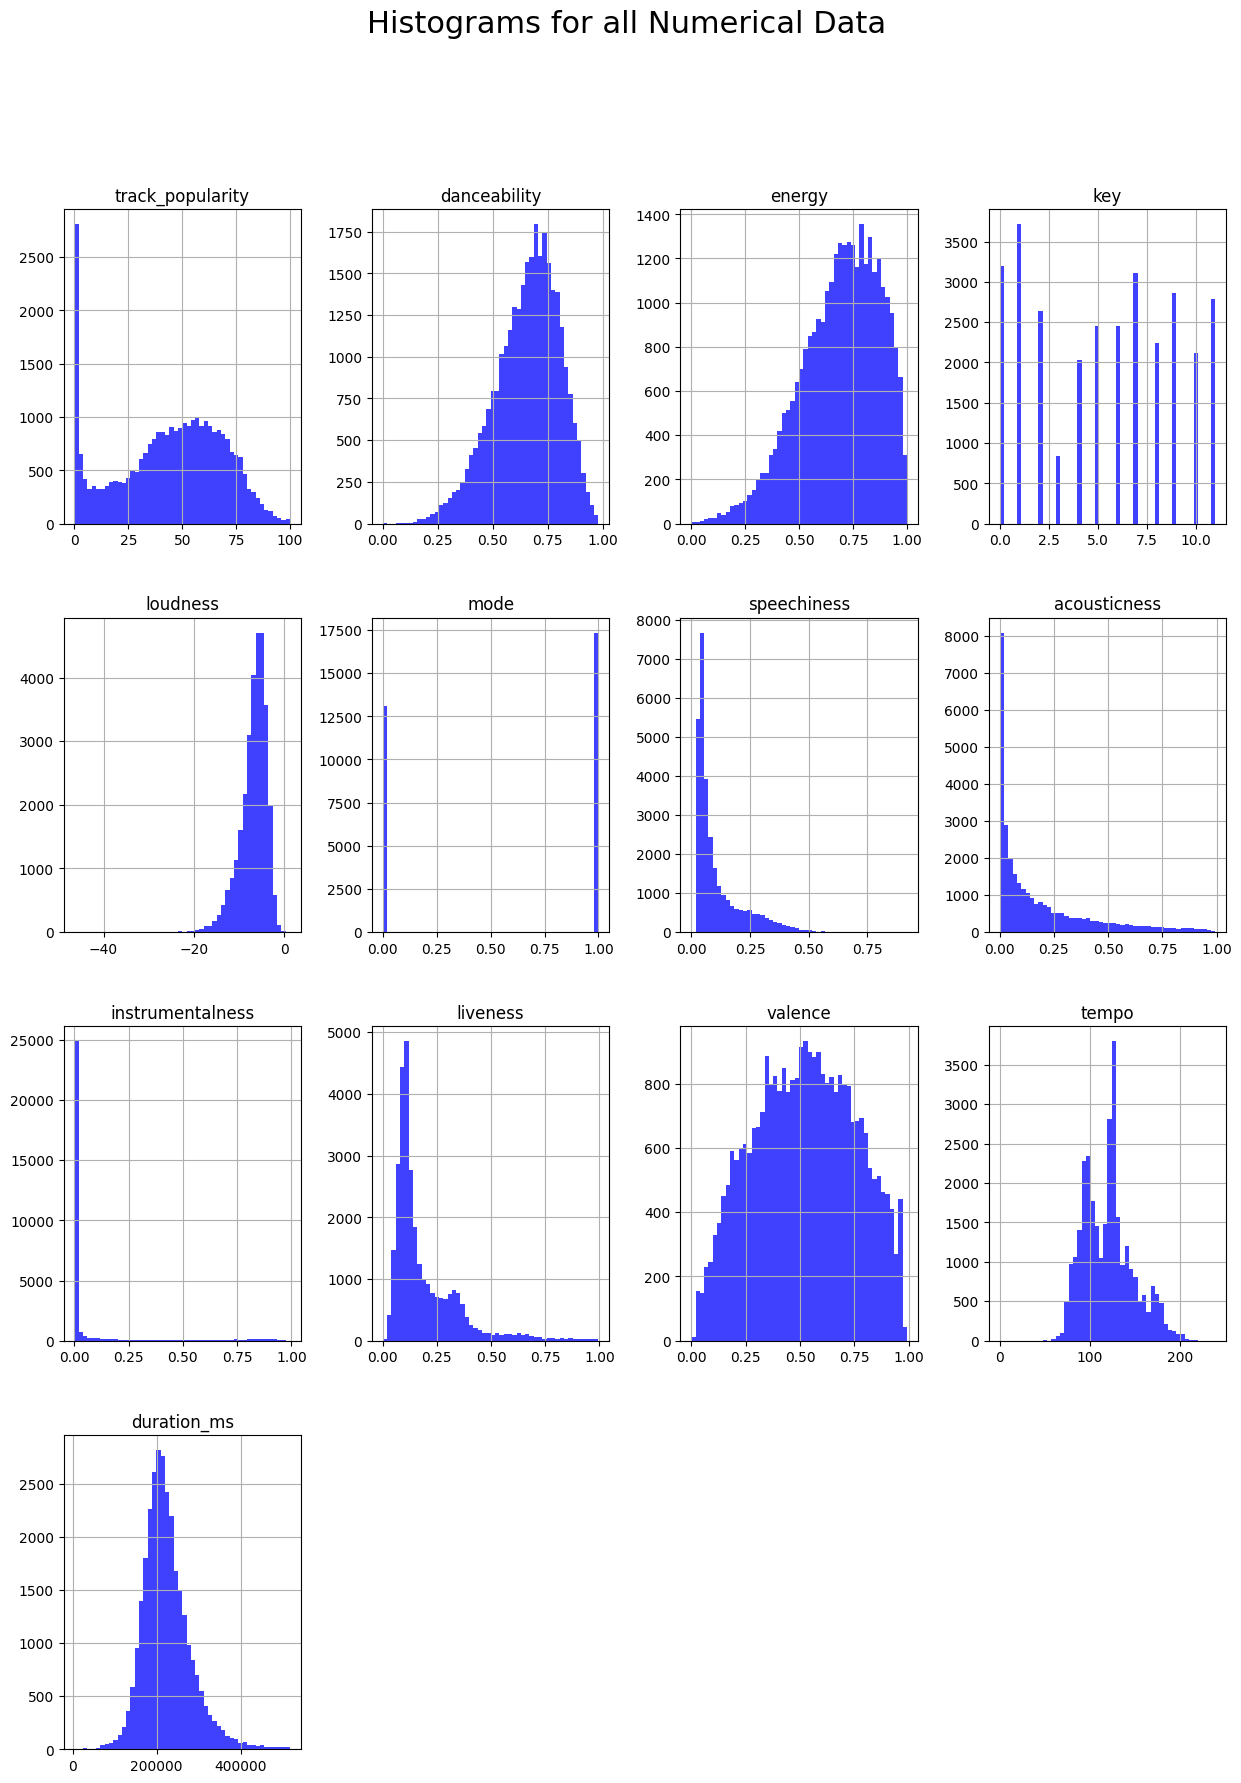

In [ ]:
# Create histograms for all numerical data in the DataFrame to understand their distributions
df.hist(bins=50,figsize=(15,20),color='blue', alpha=0.75)
plt.suptitle("Histograms for all Numerical Data", size=22)
plt.grid(True)
plt.show()

In [ ]:
# Use LabelEncoder from scikit-learn to label encode categorical variables in the DataFrame
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in df:
    if df[i].dtype == object:
        df[i] = label_encoder.fit_transform(df[i])


In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,22553,8320,2623,66.0,7661,7091,4169,271,225,2,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,2832,11698,5721,67.0,16358,9694,4346,271,225,2,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,6735,874,9803,70.0,3549,930,4189,271,225,2,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,24016,2845,8665,60.0,4930,2625,4202,271,225,2,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,5584,16810,5072,69.0,20326,13856,4074,271,225,2,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
df.corr()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,1.000000,-0.007951,-0.009407,0.019437,-0.011554,0.002350,0.009016,-0.003839,-0.000204,-0.009003,...,-0.007890,-0.001128,-0.007248,-0.002790,0.010997,-0.003046,-0.006201,0.000981,-0.002854,0.003564
track_name,-0.007951,1.000000,0.025878,-0.007128,0.004220,0.437466,0.004949,-0.002748,-0.002714,0.007553,...,0.017728,-0.017882,0.006892,-0.009598,0.014814,0.011251,0.004715,-0.009238,0.001669,-0.004129
track_artist,-0.009407,0.025878,1.000000,0.003955,-0.001094,0.058411,-0.008679,0.008357,0.001080,0.044666,...,-0.001837,-0.021151,0.020490,-0.031931,-0.010136,0.018866,0.005550,-0.008734,0.008584,-0.014616
track_popularity,0.019437,-0.007128,0.003955,1.000000,0.001748,-0.006665,0.164736,0.079413,-0.004206,-0.011222,...,-0.001517,0.074727,0.006109,-0.002346,0.065087,-0.124716,-0.053975,0.012322,0.004780,-0.119877
track_album_id,-0.011554,0.004220,-0.001094,0.001748,1.000000,-0.002407,0.005563,0.005552,-0.002165,-0.008643,...,0.007932,0.001175,0.004390,-0.019584,0.011609,0.005648,0.000498,-0.000645,-0.000705,-0.019465
track_album_name,0.002350,0.437466,0.058411,-0.006665,-0.002407,1.000000,0.010719,0.012739,-0.004679,-0.009917,...,0.008227,-0.016346,-0.011966,-0.009764,-0.001825,0.009473,0.001108,-0.011495,0.003099,-0.014746
track_album_release_date,0.009016,0.004949,-0.008679,0.164736,0.005563,0.010719,1.000000,0.076078,0.035942,-0.413294,...,0.004096,0.236203,-0.081574,0.093698,0.061095,0.092618,-0.037866,-0.224782,0.030782,-0.415488
playlist_name,-0.003839,-0.002748,0.008357,0.079413,0.005552,0.012739,0.076078,1.000000,-0.034464,0.019764,...,0.001111,-0.018659,0.009144,-0.023656,0.086460,-0.028313,-0.018376,-0.029463,0.014360,-0.021257
playlist_id,-0.000204,-0.002714,0.001080,-0.004206,-0.002165,-0.004679,0.035942,-0.034464,1.000000,-0.062447,...,-0.003932,0.008938,0.010367,-0.060878,-0.022355,0.047798,0.016062,-0.030424,0.020705,-0.025265
playlist_genre,-0.009003,0.007553,0.044666,-0.011222,-0.008643,-0.009917,-0.413294,0.019764,-0.062447,1.000000,...,-0.012890,-0.220609,0.061055,0.087287,0.044881,-0.132792,0.002823,0.048205,0.005390,0.164205


In [ ]:
# Create the feature matrix (X) by excluding the 'playlist_genre' column from the DataFrame
X = df.drop(columns = 'playlist_genre', axis = 1)
X.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,22553,8320,2623,66.0,7661,7091,4169,271,225,3,...,6.0,-2.634,1.0,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754.0
1,2832,11698,5721,67.0,16358,9694,4346,271,225,3,...,11.0,-4.969,1.0,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600.0
2,6735,874,9803,70.0,3549,930,4189,271,225,3,...,1.0,-3.432,0.0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616.0
3,24016,2845,8665,60.0,4930,2625,4202,271,225,3,...,7.0,-3.778,1.0,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093.0
4,5584,16810,5072,69.0,20326,13856,4074,271,225,3,...,1.0,-4.672,1.0,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052.0


In [ ]:
# Create the target variable (y) by selecting the 'playlist_genre' column from the DataFrame
y = df[['playlist_genre']]
print(y.head())
print(y.value_counts())

   playlist_genre
0               2
1               2
2               2
3               2
4               2
playlist_genre
4                 5746
2                 5507
3                 5431
1                 5155
5                 4951
0                 3637
6                    1
dtype: int64


In [ ]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

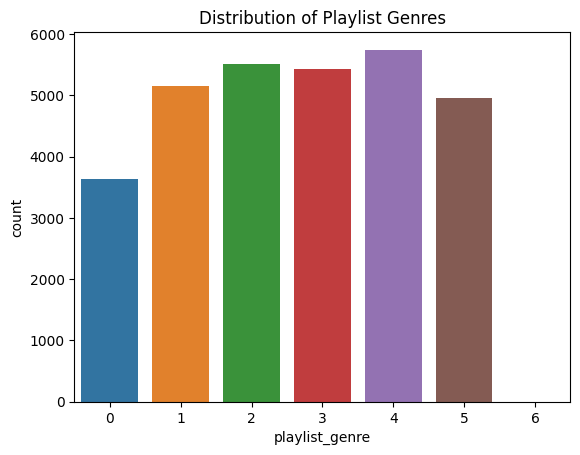

In [ ]:
# Visualize distribution of target variable
sns.countplot(x='playlist_genre', data=df)
plt.title('Distribution of Playlist Genres')
plt.show()

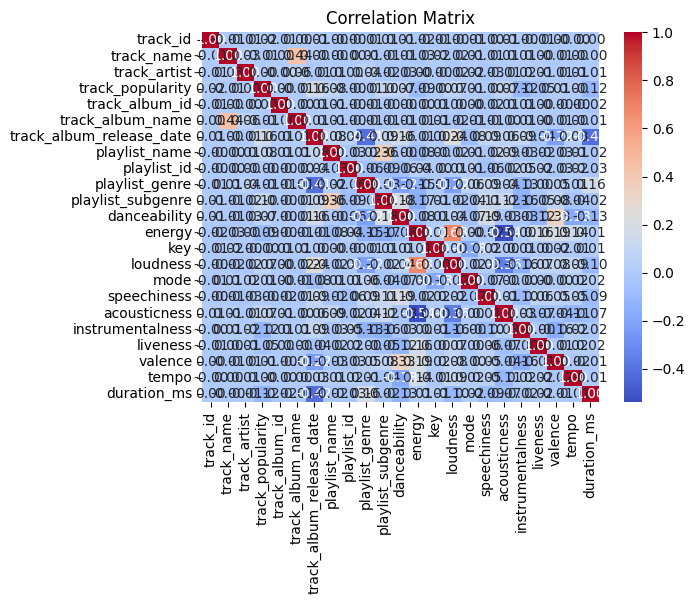

In [ ]:
# Visualize correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


 ***Feature engineering*** contributes to creating a more informative and suitable dataset for training a model to predict playlist genres based on various features.


In [ ]:
# Feature Engineering
df = df.drop(['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date'], axis=1)

# Identify and print unique values in object-type columns in the training set
object_columns = X_train.select_dtypes(include=['object']).columns

for column in object_columns:
    print(f"Unique values in {column}: {X_train[column].unique()}")

# Handle categorical columns with appropriate encoding
X_train = pd.get_dummies(X_train, columns=object_columns)
X_test = pd.get_dummies(X_test, columns=object_columns)

# Train a RandomForestClassifier model on the training s
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model's accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

# Display the Classification Report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


KeyError: ignored

In [ ]:
import plotly.express as px

# Assuming 'accuracy' is the variable storing accuracy
accuracy_fig = px.bar(x=['Accuracy'], y=[accuracy], labels={'y': 'Accuracy'})
accuracy_fig.show()


NameError: ignored

In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.metrics import precision_recall_curve, average_precision_score
# Calculate precision, recall, and average precision for each class and plot precision-recall curves
y_probs = model.predict_proba(X_test)

precisions = []
recalls = []
average_precisions = []

# For each class, calculate precision, recall, and average precision
for i in range(y_probs.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, y_probs[:, i])
    average_precision = average_precision_score(y_test == i, y_probs[:, i])

    precisions.append(precision)
    recalls.append(recall)
    average_precisions.append(average_precision)

# Plot precision-recall curves for each class
pr_curve_fig = go.Figure()

for i in range(len(precisions)):
    pr_curve_fig.add_trace(go.Scatter(x=recalls[i], y=precisions[i], mode='lines', name=f'Class {i} (AP={average_precisions[i]:.2f})'))

pr_curve_fig.update_layout(title='Precision-Recall Curve (Multiclass)', xaxis_title='Recall', yaxis_title='Precision')
pr_curve_fig.show()


NameError: ignored

In [ ]:
import plotly.figure_factory as ff

# Create confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(y_test.unique())

cm_fig = ff.create_annotated_heatmap(z=cm, x=class_labels, y=class_labels, colorscale='Viridis')
cm_fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
cm_fig.show()


**XGBoost** is a powerful and scalable gradient boosting framework that employs decision tree-based ensemble learning, optimizing predictive model performance across various regression and classification tasks.This code is a of the machine learning pipeline for predicting playlist genres. The emphasis is on preparing the data and evaluating the model's performance on unseen data.


In [ ]:
# Drop unnecessary columns from the DataFrame
df = df.drop(['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date'], axis=1)


df = pd.get_dummies(df, columns=['playlist_name', 'playlist_id'])

# Label encode the target variable 'playlist_genre'
label_encoder = LabelEncoder()
df['playlist_genre'] = label_encoder.fit_transform(df['playlist_genre'])

df = df.drop('playlist_subgenre', axis=1)

X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.columns = [f"{col}_{i}" for i, col in enumerate(X_train.columns)]
X_test.columns = [f"{col}_{i}" for i, col in enumerate(X_test.columns)]
X_train.columns = ["".join(c if c.isalnum() or c == '_' else '_' for c in str(col)) for col in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() or c == '_' else '_' for c in str(col)) for col in X_test.columns]

# Classification Model (XGBoost)
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display the Classification Report
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


In [ ]:
# Plot accuracy
accuracy_fig = px.bar(x=['Accuracy'], y=[accuracy], labels={'y': 'Accuracy'})
accuracy_fig.show()


In [ ]:
import plotly.express as px

# Assuming 'model' is your trained XGBoost model
feature_importance = model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


fig = px.bar(feature_importance_df, x='Feature', y='Importance', title='Feature Importances',
             labels={'Importance': 'Feature Importance'}, color='Importance')


fig.update_layout(xaxis_title='Feature', yaxis_title='Importance', showlegend=False)
fig.show()


In [ ]:
import plotly.figure_factory as ff

# Create confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
class_labels = sorted(y_test.unique())

cm_fig = ff.create_annotated_heatmap(z=cm, x=class_labels, y=class_labels, colorscale='Viridis')
cm_fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
cm_fig.show()



The **k-Nearest Neighbors (KNN**) model is a non-parametric and instance-based machine learning algorithm that classifies an input by assigning it the majority class label among its k nearest neighbors in the feature space.
This code is implementing the KNN classification algorithm as a model for predicting playlist genres based on the provided dataset.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Drop unnecessary columns from the DataFrame
df = df.drop(['track_id', 'track_name', 'track_artist', 'track_album_id', 'track_album_name', 'track_album_release_date'], axis=1)

df = pd.get_dummies(df, columns=['playlist_name', 'playlist_id'])

# Label encode the target variable 'playlist_genre'
label_encoder = LabelEncoder()
df['playlist_genre'] = label_encoder.fit_transform(df['playlist_genre'])

df = df.drop('playlist_subgenre', axis=1)

X = df.drop('playlist_genre', axis=1)
y = df['playlist_genre']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rename columns to avoid potential issues with KNN
X_train.columns = [f"{col}_{i}" for i, col in enumerate(X_train.columns)]
X_test.columns = [f"{col}_{i}" for i, col in enumerate(X_test.columns)]
X_train.columns = ["".join(c if c.isalnum() or c == '_' else '_' for c in str(col)) for col in X_train.columns]
X_test.columns = ["".join(c if c.isalnum() or c == '_' else '_' for c in str(col)) for col in X_test.columns]

# Classification Model (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Evaluate the KNN model's accuracy
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Display the Classification Report for KNN
print(f'Accuracy (KNN): {accuracy_knn:.2f}')
print('\nClassification Report (KNN):')
print(classification_report(y_test, y_pred_knn))
print('\nConfusion Matrix (KNN):')
print(confusion_matrix(y_test, y_pred_knn))

In [ ]:
accuracy_fig = px.bar(x=['Accuracy'], y=[accuracy_knn], labels={'y': 'Accuracy'})
accuracy_fig.show()


In [ ]:
import plotly.figure_factory as ff

# Create confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred_knn)
class_labels = sorted(y_test.unique())

cm_fig = ff.create_annotated_heatmap(z=cm, x=class_labels, y=class_labels, colorscale='Viridis')
cm_fig.update_layout(title='Confusion Matrix', xaxis_title='Predicted Label', yaxis_title='True Label')
cm_fig.show()